In [116]:
#import wave generating function from utils file
from utils.waves import gen_sine

In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
amplitude = 0.25
frequency = 92.5
sr = 48000
secs = 1/4
noise = 0.05

example_wave = gen_sine(frequency,sr,secs, noise,amplitude=amplitude)[:,0]

Text(0, 0.5, 'amplitude')

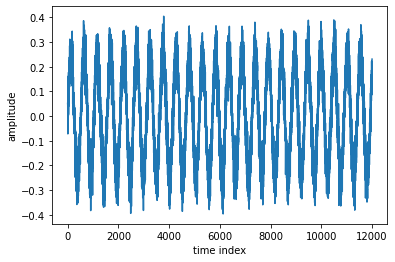

In [119]:
plt.plot(example_wave)
plt.xlabel('time index')
plt.ylabel('amplitude')

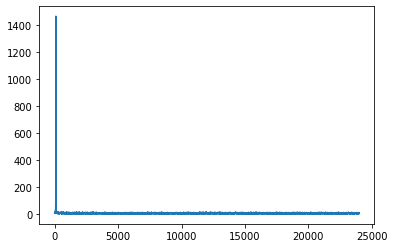

In [120]:
example_freq_dom = np.fft.fft(example_wave,n = len(example_wave))

example_freq_dom = example_freq_dom[range(int(len(example_wave)/2))] 


tpCount     = len(example_wave)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/sr

frequencies = values/timePeriod

plt.plot(frequencies, abs(example_freq_dom))

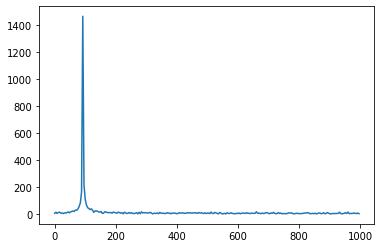

In [121]:
indexes = frequencies<1000
plt.plot(frequencies[indexes], abs(example_freq_dom)[indexes])

In [122]:
print(frequencies[:100])

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180. 184. 188. 192. 196. 200. 204. 208. 212. 216. 220.
 224. 228. 232. 236. 240. 244. 248. 252. 256. 260. 264. 268. 272. 276.
 280. 284. 288. 292. 296. 300. 304. 308. 312. 316. 320. 324. 328. 332.
 336. 340. 344. 348. 352. 356. 360. 364. 368. 372. 376. 380. 384. 388.
 392. 396.]


In [123]:
frequencies[np.argmax(abs(example_freq_dom))]

92.0